In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path

In [2]:
data = list()


for path in Path('../data/parts/').glob('*.csv'):
    datum = pd.read_csv(path, sep=',', index_col=0)
    data.append(datum)

common = pd.concat(data, ignore_index=True)

groups = ['decent', 'moral', 'person']
filtred_labels = ['unmarked', 'skipped']

for group in groups:
    for label in filtred_labels:
        common = common[(common[group] != label)]

common['insult'] = 'non-insult'
common['insult'][  (common['decent'] == 'obscene') 
                  & (common['moral'] == 'immoral')
                  & (common['person'] == 'person')] = 'insult'
        
mapper = { 'decent': '',
           'obscene': 'Содержащие',
           'moral': '',
           'immoral': 'Содержащие',
           'person': 'Содержащие',
           'imperson': '',
           'non-insult': '',
           'insult': 'Содержащие'
          }

groups = ['insult'] + groups

In [3]:
def label_generator(total):
    def callee(ratio):
        value = int(total * ratio / 100)

        return f'{ratio:.1f} %\n({value})'
    return callee

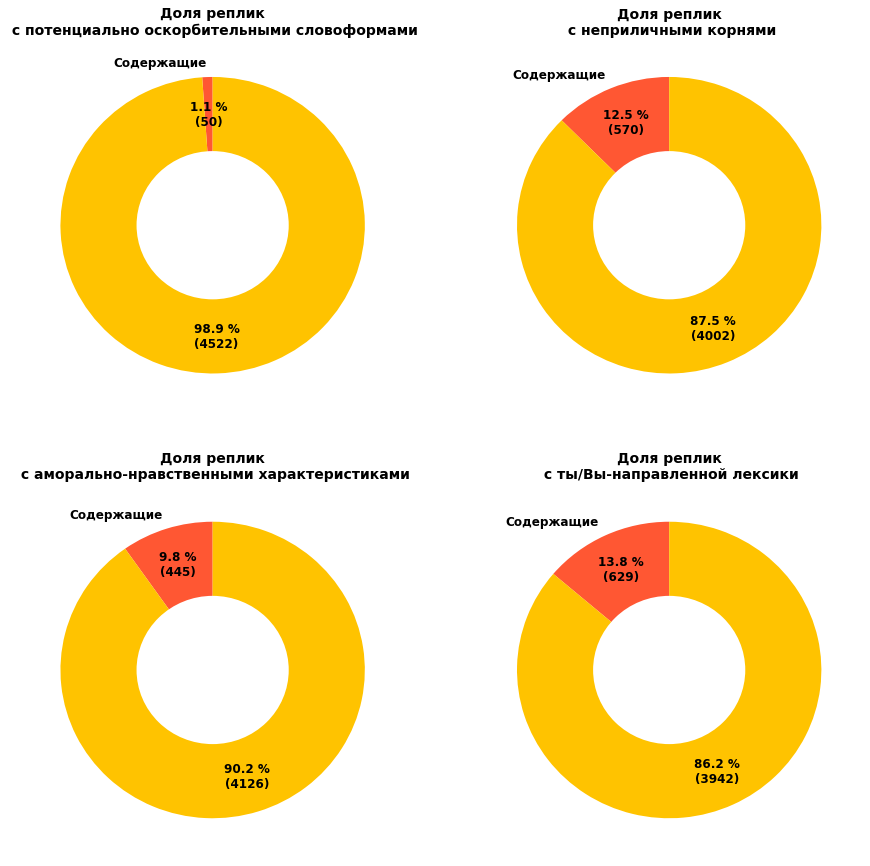

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

colors = ['#FF5733','#FFC300']

fontsize = 12

titles = [ 'Доля реплик\n c потенциально оскорбительными словоформами',
           'Доля реплик\n с неприличными корнями',
           'Доля реплик\n с аморально-нравственными характеристиками',
           'Доля реплик\n с ты/Вы-направленной лексики']

for idx, group in zip(range(0, 4), groups):
    labels = common[group].unique()

    stats = list()

    for label in labels:
        value = np.sum(common[group] == label)
        stats.append(value)
        
    if stats[0] > stats[1]:
        stats = stats[::-1]
        labels = labels[::-1]
        
    labels = [ mapper[label] for label in labels ]

    ax[idx // 2][idx % 2].pie( stats,
                            colors=colors,
                            labels=labels,
                            autopct=label_generator(np.sum(stats)),
                            startangle=90,
                            pctdistance=0.75,
                            labeldistance=1.1,
                            textprops={ 'fontsize': fontsize,
                                         'color': 'k',
                                         'weight': 'bold' } )
    
    centre = plt.Circle( xy=(0, 0),
                         radius=0.50,
                         fc='white' )

    ax[idx // 2][idx % 2].add_patch(centre)
    ax[idx // 2][idx % 2].set_title(titles[idx], fontsize=fontsize+2, weight='bold')